In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/active_users.csv
/kaggle/input/clean_raw_data_version3_mean_minmax.csv


## Install libraries

In [2]:
!pip install torch-geometric
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.1 MB ? eta -:--:--
     ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.2/1.1 MB 7.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.1/1.1 MB 20.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.6 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.6/1.6 MB 146.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/241.9 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 16.7 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/206.6 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.6/206.6 kB 18.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/319.7 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 18.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/383.6 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 245.8/383.6 kB 7.1 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/231.8 kB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 20.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.1 MB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 3.1/3.1 MB 95.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/78.5 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/599.5 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 33.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


## Read dataset

In [3]:
raw_data = pd.read_csv("/kaggle/input/active_users.csv")
raw_data.head()

,user_id,course_id,gender,school,enroll_time,comment_count_week1,reply_count_week1,questions_done_week1,attempts_count_week1,correct_answers_week1,...,reply_count_week4,questions_done_week4,attempts_count_week4,correct_answers_week4,total_score_week4,user_watching_time_week4,classification,classification_encoded,school_encoded,course_id_encoded
0,U_1001413,C_735164,0.0,昆明理工大学,2020-11-26 23:40:08,NaN,NaN,156.0,164.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,A,0,476,138
1,U_1001522,C_735164,0.0,昆明理工大学,2020-12-01 11:11:06,NaN,NaN,156.0,156.0,156.0,...,NaN,NaN,NaN,NaN,NaN,NaN,A,0,476,138
2,U_1001694,C_735164,0.0,昆明理工大学,2020-11-18 19:49:32,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,0,476,138
3,U_1001697,C_735164,0.0,昆明理工大学,2020-11-28 11:03:45,NaN,NaN,5.0,8.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,A,0,476,138
4,U_1001703,C_735164,0.0,昆明理工大学,2020-10-19 20:57:49,NaN,NaN,NaN,NaN,NaN,...,NaN,108.0,109.0,108.0,130.0,NaN,A,0,476,138


## Import libraries

In [5]:
import networkx as nx
from torch_geometric.data import Data
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Create graph with networkX

In [6]:
df = raw_data.copy()

Đang đọc dữ liệu từ -f...
Lỗi khi đọc dữ liệu: [Errno 2] No such file or directory: '-f'


Dữ liệu có 16391 dòng và 37 cột

Kiểm tra ràng buộc trước khi điền khuyết:


Tất cả các ràng buộc đều được thỏa mãn!


Epoch 20/100, Loss: -0.3028, Time: 28.81s


Early stopping at epoch 29



Kiểm tra ràng buộc sau khi điền khuyết:


Tất cả các ràng buộc đều được thỏa mãn!


Early stopping at epoch 19


Validation MSE: 1574.7951


Thời gian thực hiện: 1420.02 giây



Đã lưu dữ liệu điền khuyết vào: -f


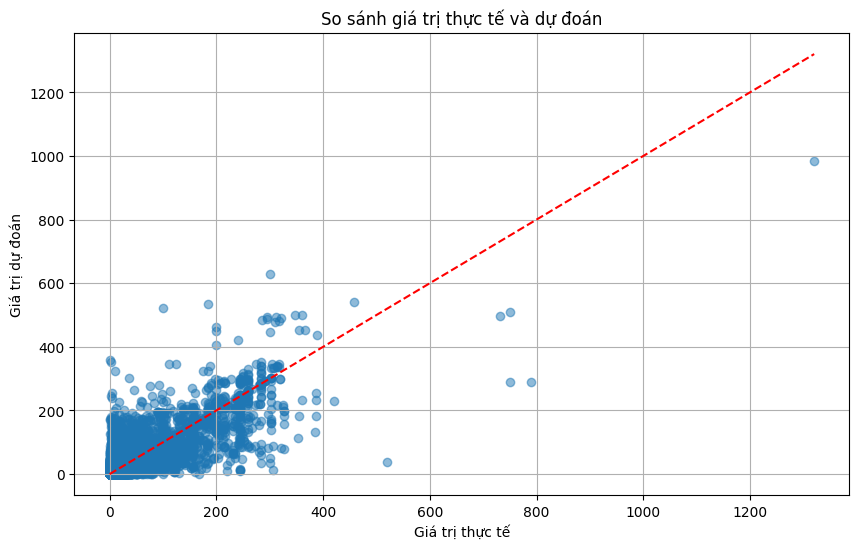

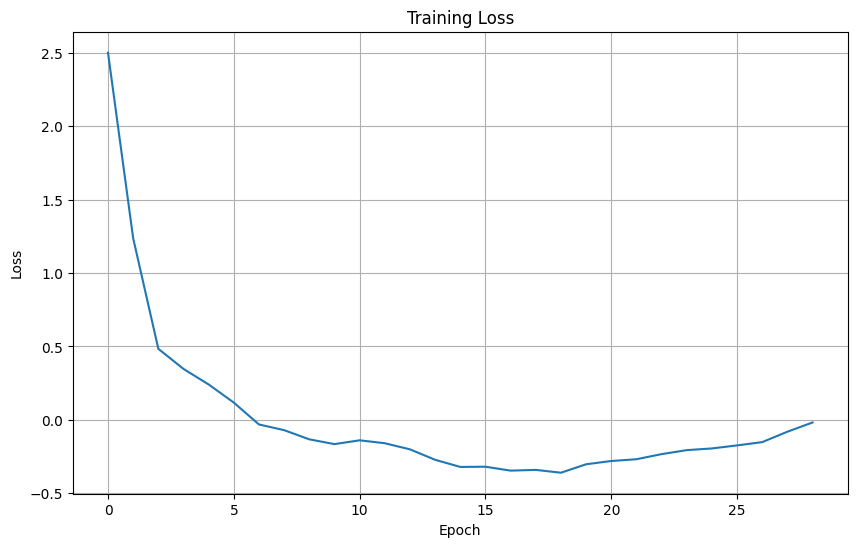

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import time
import re

# Danh sách các cột cần điền khuyết
WEEKLY_COLUMNS = [
    'comment_count_week1', 'reply_count_week1', 'questions_done_week1', 
    'attempts_count_week1', 'correct_answers_week1', 'total_score_week1',
    'user_watching_time_week1', 'comment_count_week2', 'reply_count_week2',
    'questions_done_week2', 'attempts_count_week2', 'correct_answers_week2',
    'total_score_week2', 'user_watching_time_week2', 'comment_count_week3',
    'reply_count_week3', 'questions_done_week3', 'attempts_count_week3',
    'correct_answers_week3', 'total_score_week3', 'user_watching_time_week3',
    'comment_count_week4', 'reply_count_week4', 'questions_done_week4',
    'attempts_count_week4', 'correct_answers_week4', 'total_score_week4',
    'user_watching_time_week4'
]

# Ánh xạ biểu thức chính quy cho các cột theo tuần
def get_column_patterns():
    patterns = {
        'comment_count': re.compile(r'comment_count_week(\d+)'),
        'reply_count': re.compile(r'reply_count_week(\d+)'),
        'questions_done': re.compile(r'questions_done_week(\d+)'),
        'attempts_count': re.compile(r'attempts_count_week(\d+)'),
        'correct_answers': re.compile(r'correct_answers_week(\d+)'),
        'total_score': re.compile(r'total_score_week(\d+)'),
        'user_watching_time': re.compile(r'user_watching_time_week(\d+)')
    }
    return patterns

# Tiền xử lý dữ liệu: sử dụng giá trị trung bình để thay thế giá trị thiếu cho các cột đặc trưng
def preprocess_data(df):
    df_copy = df.copy()
    
    if 'enroll_time' in df_copy.columns:
        df_copy['enroll_time'] = pd.to_datetime(df_copy['enroll_time'])
        df_copy['enroll_time_num'] = (df_copy['enroll_time'] - df_copy['enroll_time'].min()).dt.total_seconds()
    
    feature_cols = [col for col in WEEKLY_COLUMNS if col in df_copy.columns]
    support_cols = ['school_encoded', 'course_id_encoded', 'gender', 'enroll_time_num']
    support_cols = [col for col in support_cols if col in df_copy.columns]
    
    scaler = StandardScaler()
    # Thay giá trị thiếu bằng giá trị trung bình của cột trước khi chuẩn hoá
    df_copy[feature_cols] = scaler.fit_transform(
    df_copy[feature_cols].fillna(
        df_copy.groupby('classification')[feature_cols].transform('mean')
    )
)
    
    return df_copy, feature_cols, scaler

# Tạo đồ thị tương đồng dựa trên khoảng cách và nhóm theo trường, khóa học sử dụng ma trận kề
def create_graph(df, feature_cols, k=5, prune_threshold=0.5):
    x = torch.tensor(df[feature_cols].fillna(0).values, dtype=torch.float)
    n = len(df)
    
    # Khởi tạo ma trận kề với các phần tử bằng 0
    adj = np.zeros((n, n))
    
    # Tạo cạnh từ nhóm dữ liệu có cùng school_encoded và course_id_encoded
    if 'school_encoded' in df.columns and 'course_id_encoded' in df.columns:
        grouped = df.groupby(['school_encoded', 'course_id_encoded']).indices
        for indices in grouped.values():
            indices = list(indices)
            if len(indices) > 1:
                for i in range(len(indices)):
                    for j in range(i+1, len(indices)):
                        adj[indices[i], indices[j]] = 1
                        adj[indices[j], indices[i]] = 1
    
    # Nếu số cạnh từ nhóm không đủ, tính khoảng cách giữa các điểm và thêm cạnh dựa trên độ tương đồng
    if adj.sum() < n:
        base_features = x.numpy()
        is_all_zero = np.all(base_features == 0, axis=0)
        if np.any(is_all_zero):
            base_features = base_features[:, ~is_all_zero]
        
        if base_features.shape[1] == 0:
            print("Tất cả các đặc trưng đều bằng 0, không thể tạo cạnh dựa trên khoảng cách.")
        else:
            dist_matrix = squareform(pdist(base_features, 'euclidean'))
            dist_std = dist_matrix.std() if dist_matrix.std() > 0 else 1
            sim_matrix = np.exp(-dist_matrix / dist_std)
            sim_matrix[sim_matrix < prune_threshold] = 0
            
            k = min(k, n-1)
            # Lấy k láng giềng có độ tương đồng cao nhất cho mỗi nút (loại trừ chính nó)
            neighbors = np.argsort(sim_matrix, axis=1)[:, -k:]
            for i in range(n):
                for j in neighbors[i]:
                    if sim_matrix[i, j] > 0:
                        adj[i, j] = 1
                        adj[j, i] = 1  # đảm bảo đồ thị đối xứng
    
    # Chuyển ma trận kề thành edge_index (các vị trí có giá trị khác 0)
    edge_index = torch.tensor(np.array(np.nonzero(adj)), dtype=torch.long)
    
    # Tạo mask cho các giá trị không phải NaN (dựa trên giá trị ban đầu trong df)
    mask = torch.tensor(~np.isnan(df[feature_cols].values), dtype=torch.bool)
    
    return Data(x=x, edge_index=edge_index), mask

# Mô hình GCN Imputer với residual connections, định nghĩa rõ ràng từng tầng
class GCNImputer(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.2):
        super(GCNImputer, self).__init__()
        self.dropout = dropout
        # Encoder
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.bn2 = nn.BatchNorm1d(hidden_channels)
        # Decoder
        self.dec_conv1 = GCNConv(hidden_channels, hidden_channels)
        self.dec_bn1 = nn.BatchNorm1d(hidden_channels)
        self.dec_conv2 = GCNConv(hidden_channels, out_channels)
        # Residual connection
        self.residual = nn.Linear(in_channels, out_channels)
        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        # Encoder
        h = self.conv1(x, edge_index)
        h = self.bn1(h)
        h = F.relu(h)
        h = F.dropout(h, p=self.dropout, training=self.training)
        h = self.conv2(h, edge_index)
        h = self.bn2(h)
        h = F.relu(h)
        h = F.dropout(h, p=self.dropout, training=self.training)
        # Decoder
        out = self.dec_conv1(h, edge_index)
        out = self.dec_bn1(out)
        out = F.relu(out)
        out = F.dropout(out, p=self.dropout, training=self.training)
        out = self.dec_conv2(out, edge_index)
        # Residual connection
        out = out + self.residual(x)
        return out

# Critic Network cho Adversarial Training, định nghĩa các tầng rõ ràng
class Critic(nn.Module):
    def __init__(self, in_channels, hidden_channels, dropout=0.2):
        super(Critic, self).__init__()
        self.dropout = dropout
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.bn2 = nn.BatchNorm1d(hidden_channels)
        self.conv3 = GCNConv(hidden_channels, 1)
        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        h = self.conv1(x, edge_index)
        h = self.bn1(h)
        h = F.relu(h)
        h = F.dropout(h, p=self.dropout, training=self.training)
        h = self.conv2(h, edge_index)
        h = self.bn2(h)
        h = F.relu(h)
        h = F.dropout(h, p=self.dropout, training=self.training)
        out = self.conv3(h, edge_index)
        return out

# Áp dụng ràng buộc lên dữ liệu với các phép tính vector hoá
def apply_constraints(df, feature_cols):
    patterns = get_column_patterns()
    for col in feature_cols:
        for pattern_name, pattern in patterns.items():
            match = pattern.match(col)
            if match:
                week = int(match.group(1))
                if pattern_name in ['comment_count', 'reply_count', 'questions_done', 'total_score', 'user_watching_time']:
                    df[col] = df[col].clip(lower=0)
                elif pattern_name == 'attempts_count':
                    questions_col = f'questions_done_week{week}'
                    if questions_col in df.columns:
                        df[col] = np.maximum(df[col], df[questions_col])
                elif pattern_name == 'correct_answers':
                    questions_col = f'questions_done_week{week}'
                    if questions_col in df.columns:
                        df[col] = np.minimum(np.maximum(df[col], 0), df[questions_col])
    return df

# Huấn luyện với Adversarial Training
def adversarial_train(model, critic, data, mask, original_values, optimizer_model, optimizer_critic, epochs=100, early_stop_patience=10):
    model.train()
    critic.train()
    losses = []
    best_loss = float('inf')
    patience_counter = 0
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    critic = critic.to(device)
    data = data.to(device)
    mask = mask.to(device)
    original_values = original_values.to(device)
    
    for epoch in range(epochs):
        start_time = time.time()
        ## Huấn luyện Critic
        optimizer_critic.zero_grad()
        real_out = critic(data)
        fake_data = data.clone()
        fake_data.x = model(data)
        fake_out = critic(fake_data)
        
        # Tạo interpolates cho gradient penalty
        alpha = torch.rand(data.x.size(0), 1, device=device)
        interpolates = alpha * data.x + (1 - alpha) * fake_data.x
        interpolates = interpolates.requires_grad_(True)
        interpolates_data = data.clone()
        interpolates_data.x = interpolates
        interpolates_out = critic(interpolates_data)
        
        gradients = torch.autograd.grad(outputs=interpolates_out, inputs=interpolates,
                                        grad_outputs=torch.ones_like(interpolates_out),
                                        create_graph=True, retain_graph=True)[0]
        gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
        
        critic_loss = fake_out.mean() - real_out.mean() + 10 * gradient_penalty
        critic_loss.backward()
        optimizer_critic.step()
        
        ## Huấn luyện Model
        optimizer_model.zero_grad()
        fake_data = data.clone()
        fake_data.x = model(data)
        fake_out = critic(fake_data)
        
        valid_mask = mask.sum(dim=0) > 0
        col_losses = torch.zeros(mask.shape[1], device=device)
        # Tính loss theo từng cột (mse cho các giá trị không bị ẩn)
        for col_idx in range(mask.shape[1]):
            if valid_mask[col_idx]:
                col_mask = mask[:, col_idx]
                col_losses[col_idx] = F.mse_loss(
                    fake_data.x[col_mask, col_idx], 
                    original_values[col_mask, col_idx]
                )
        
        model_loss = -fake_out.mean() + col_losses[valid_mask].mean()
        model_loss.backward()
        optimizer_model.step()
        
        losses.append(model_loss.item())
        
        if model_loss.item() < best_loss:
            best_loss = model_loss.item()
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= early_stop_patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
        
        if (epoch+1) % 20 == 0:
            elapsed = time.time() - start_time
            print(f'Epoch {epoch+1}/{epochs}, Loss: {model_loss.item():.4f}, Time: {elapsed:.2f}s')
    
    return losses

# Điền giá trị khuyết sử dụng mô hình đã huấn luyện
def impute_missing_values(df, model, data, feature_cols, scaler):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    data = data.to(device)
    model = model.to(device)
    
    with torch.no_grad():
        imputed_features = model(data).cpu().numpy()
    
    # Áp dụng inverse transform để chuyển về scale ban đầu
    imputed_features = scaler.inverse_transform(imputed_features)
    df_imputed = df.copy()
    
    for i, col in enumerate(feature_cols):
        missing_idx = df_imputed[col].isna()
        if missing_idx.any():
            df_imputed.loc[missing_idx, col] = imputed_features[missing_idx, i]
    
    # Áp dụng ràng buộc sau khi điền khuyết
    df_imputed = apply_constraints(df_imputed, feature_cols)
    
    return df_imputed

# Đánh giá kết quả imputation bằng cách ẩn một số giá trị có sẵn và so sánh
def evaluate_imputation(df, feature_cols, test_size=0.1):
    validation_df = df.copy()
    np.random.seed(42)
    
    non_nan_mask = ~df[feature_cols].isna().values
    row_indices, col_indices = np.where(non_nan_mask)
    
    if len(row_indices) == 0:
        print("Không có đủ dữ liệu để đánh giá")
        return None, [], []
    
    num_to_hide = max(1, int(len(row_indices) * test_size))
    indices_to_hide = np.random.choice(len(row_indices), num_to_hide, replace=False)
    
    hide_rows = row_indices[indices_to_hide]
    hide_cols = col_indices[indices_to_hide]
    
    true_values = []
    # Sử dụng .loc để gán giá trị NaN, tránh cảnh báo SettingWithCopyWarning
    for i in range(len(hide_rows)):
        row_idx = hide_rows[i]
        col_idx = hide_cols[i]
        col_name = feature_cols[col_idx]
        true_values.append(validation_df.loc[row_idx, col_name])
        validation_df.loc[row_idx, col_name] = np.nan
    
    val_df_processed, val_feature_cols, val_scaler = preprocess_data(validation_df)
    val_graph, val_mask = create_graph(val_df_processed, val_feature_cols)
    
    val_model = GCNImputer(len(val_feature_cols), 128, len(val_feature_cols), dropout=0.2)
    val_critic = Critic(len(val_feature_cols), 128, dropout=0.2)
    val_optimizer_model = torch.optim.Adam(val_model.parameters(), lr=0.01, weight_decay=1e-5)
    val_optimizer_critic = torch.optim.Adam(val_critic.parameters(), lr=0.01, weight_decay=1e-5)
    
    val_original_values = torch.tensor(val_df_processed[val_feature_cols].values, dtype=torch.float)
    
    adversarial_train(val_model, val_critic, val_graph, val_mask, val_original_values, 
                        val_optimizer_model, val_optimizer_critic, epochs=100)
    val_df_imputed = impute_missing_values(validation_df, val_model, val_graph, val_feature_cols, val_scaler)
    
    predicted_values = []
    for i in range(len(hide_rows)):
        row_idx = hide_rows[i]
        col_idx = hide_cols[i]
        col_name = feature_cols[col_idx]
        predicted_values.append(val_df_imputed.loc[row_idx, col_name])
    
    if len(true_values) > 0:
        mse = mean_squared_error(true_values, predicted_values)
        print(f"Validation MSE: {mse:.4f}")
        
        plt.figure(figsize=(10, 6))
        plt.scatter(true_values, predicted_values, alpha=0.5)
        min_val = min(min(true_values), min(predicted_values))
        max_val = max(max(true_values), max(predicted_values))
        plt.plot([min_val, max_val], [min_val, max_val], 'r--')
        plt.xlabel('Giá trị thực tế')
        plt.ylabel('Giá trị dự đoán')
        plt.title('So sánh giá trị thực tế và dự đoán')
        plt.grid(True)
        
        return mse, true_values, predicted_values
    else:
        print("Không có dữ liệu để đánh giá")
        return None, [], []

# Kiểm tra các ràng buộc trên dữ liệu
def check_constraints(df, verbose=True):
    patterns = get_column_patterns()
    violations = 0
    
    for col in df.columns:
        for pattern_name, pattern in patterns.items():
            match = pattern.match(col)
            if match:
                week = int(match.group(1))
                if pattern_name in ['comment_count', 'reply_count', 'questions_done', 'attempts_count', 'total_score', 'user_watching_time']:
                    neg_count = (df[col] < 0).sum()
                    if neg_count > 0 and verbose:
                        print(f"Vi phạm: {neg_count} giá trị âm trong cột {col}")
                    violations += neg_count
                elif pattern_name == 'correct_answers':
                    questions_col = f'questions_done_week{week}'
                    if questions_col in df.columns:
                        invalid_neg = (df[col] < 0).sum()
                        invalid_high = (df[col] > df[questions_col]).sum()
                        if invalid_neg > 0 and verbose:
                            print(f"Vi phạm: {invalid_neg} giá trị âm trong cột {col}")
                        if invalid_high > 0 and verbose:
                            print(f"Vi phạm: {invalid_high} trường hợp {col} > {questions_col}")
                        violations += (invalid_neg + invalid_high)
    
    if violations == 0 and verbose:
        print("Tất cả các ràng buộc đều được thỏa mãn!")
    
    return violations

# Hàm chính
def main(data_path, columns_to_impute=None):
    total_start_time = time.time()
    print(f"Đang đọc dữ liệu từ {data_path}...")
    try:
        df = pd.read_csv(data_path)
    except Exception as e:
        print(f"Lỗi khi đọc dữ liệu: {e}")
        df = pd.read_csv("/kaggle/input/active_users.csv")
    
    print(f"Dữ liệu có {len(df)} dòng và {len(df.columns)} cột")
    
    if columns_to_impute is None:
        columns_to_impute = [col for col in WEEKLY_COLUMNS if col in df.columns]
    
    # Kiểm tra ràng buộc trước khi xử lý
    print("\nKiểm tra ràng buộc trước khi điền khuyết:")
    check_constraints(df, verbose=True)
    
    df_processed, feature_cols, scaler = preprocess_data(df)
    graph, mask = create_graph(df_processed, feature_cols)
    original_values = torch.tensor(df_processed[feature_cols].values, dtype=torch.float)
    
    model = GCNImputer(len(feature_cols), 128, len(feature_cols), dropout=0.3)
    critic = Critic(len(feature_cols), 128, dropout=0.3)
    optimizer_model = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-5)
    optimizer_critic = torch.optim.Adam(critic.parameters(), lr=0.01, weight_decay=5e-5)
    
    losses = adversarial_train(model, critic, graph, mask, original_values, optimizer_model, optimizer_critic, epochs=100)
    df_imputed = impute_missing_values(df, model, graph, feature_cols, scaler)
    
    # Kiểm tra ràng buộc sau khi điền khuyết
    print("\nKiểm tra ràng buộc sau khi điền khuyết:")
    check_constraints(df_imputed, verbose=True)
    
    mse, true_values, predicted_values = evaluate_imputation(df, feature_cols)
    
    if losses:
        plt.figure(figsize=(10, 6))
        plt.plot(losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss')
        plt.grid(True)
    
    elapsed_time = time.time() - total_start_time
    print(f"Thời gian thực hiện: {elapsed_time:.2f} giây")
    
    output_path = data_path.replace('.csv', '_imputed.csv')
    df_imputed.to_csv(output_path, index=False)
    print(f"\nĐã lưu dữ liệu điền khuyết vào: {output_path}")
    
    return df_imputed

# Chạy chương trình
if __name__ == "__main__":
    import sys
    
    if len(sys.argv) > 1:
        data_path = sys.argv[1]
    else:
        data_path = '/kaggle/input/active_users.csv'
    
    main(data_path, WEEKLY_COLUMNS)